## Usar el entorno "entorno_ufv_fastapi"

In [1]:
# Librer√≠as principales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import random

# Silenciar warnings globales
warnings.filterwarnings('ignore')

# Ajustes visuales para gr√°ficos
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 11

# Configuraci√≥n de opciones pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 2)

print("Entorno configurado: sin warnings, visualizaci√≥n optimizada, pandas listo.")


Entorno configurado: sin warnings, visualizaci√≥n optimizada, pandas listo.


### Dataset con correlaciones 

Las correlaciones que vamos a introducir son:

- Edad est√° negativamente correlacionada con Estado Emocional y ligeramente con Asistencia.

- Estado Emocional, Asistencia y Uso Biblioteca se correlacionan positivamente con las Notas y con Porcentaje de Ex√°menes Aprobados.

- Abandono est√° asociado claramente a baja asistencia, bajo estado emocional y rendimiento bajo.

- Beca depende directamente del rendimiento acad√©mico, como suma de ambas notas.



### Outliers (at√≠picos)

üéØ ¬øQu√© tipo de outliers vamos a introducir?
Notas muy altas con baja asistencia (alguien brillante pero poco presente).

Uso excesivo de biblioteca sin mejora en rendimiento.

Estado emocional bajo pero con notas excelentes (casos excepcionales).

Estudiantes que abandonan con buen promedio acad√©mico.

Edad fuera del rango t√≠pico de grado (mayores de 38).

Todo esto en peque√±as proporciones (<3%) para no distorsionar la correlaci√≥n general, pero s√≠ dejar espacio para an√°lisis m√°s matizado.

### Generaci√≥n de datos

In [2]:
# Semillas para reproducibilidad
np.random.seed(42)
random.seed(42)

# Valores posibles
cursos = ['Primero', 'Segundo', 'Tercero', 'Cuarto', 'Quinto']
grados = ['Grado en Ciencias', 'Grado en Humanidades', 'Grado en Ingenier√≠a', 'Grado en Salud', 'Grado en Empresa']
facultades = ['Ciencias', 'Humanidades', 'Ingenier√≠a', 'Salud', 'Empresariales']
sexos = ['Masculino', 'Femenino']
nacionalidades = ['Espa√±ola', 'Colombiana', 'Argentina', 'Mexicana', 'Italiana', 'Francesa']
tipos_acceso = ['Examen', 'Convalidaci√≥n', 'Transferencia']
num_registros = 18000

# Funci√≥n generadora con correlaciones estructuradas
def generar_estudiante(i):
    edad = np.random.randint(17, 41)

    estado_emocional = max(1, min(5, 6 - int((edad - 17) / 5) + np.random.randint(-1, 2)))
    asistencia = round(np.clip(0.6 + estado_emocional * 0.08 + np.random.normal(0, 0.05), 0.6, 1.0), 2)
    biblioteca = np.random.poisson(lam=estado_emocional + asistencia * 4)
    asignaturas = np.random.randint(6, 12)

    nota1 = round(np.clip(5 + asistencia * 2 + estado_emocional * 0.5 + biblioteca * 0.1 + np.random.normal(0, 0.5), 0, 10), 2)
    nota2 = round(np.clip(nota1 + np.random.normal(0.2, 0.4), 0, 10), 2)

    porcentaje_aprobados = round(np.clip(0.6 + asistencia * 0.3 + estado_emocional * 0.05 + biblioteca / 40, 0, 1), 2)
    abandono = 'S√≠' if asistencia < 0.7 and estado_emocional < 2 and nota1 < 5.5 else 'No'
    beca = 'S√≠' if nota1 + nota2 > 14.5 else 'No'
    tipo_acceso = random.choices(tipos_acceso, weights=[0.75, 0.15, 0.10])[0]

    return {
        'ID': i + 1,
        'Edad': edad,
        'Curso': random.choice(cursos),
        'Grado': random.choice(grados),
        'Facultad': random.choice(facultades),
        'Sexo': random.choice(sexos),
        'Nacionalidad': random.choice(nacionalidades),
        'Nota Primer Semestre': nota1,
        'Nota Segundo Semestre': nota2,
        'Asignaturas': asignaturas,
        'Porcentaje Ex√°menes Aprobados': porcentaje_aprobados,
        'Tipo de Acceso': tipo_acceso,
        'Asistencia': asistencia,
        'Uso Biblioteca': int(np.clip(biblioteca, 0, 15)),
        'Beca': beca,
        'Estado Emocional': estado_emocional,
        'Abandono': abandono
    }

# Crear dataset
datos = [generar_estudiante(i) for i in range(num_registros)]
df = pd.DataFrame(datos)

# Crear carpeta y guardar CSV
os.makedirs('data', exist_ok=True)
df.to_csv('data/dataset_estudiantes.csv', index=False, encoding='utf-8-sig')

print(f"Dataset de {num_registros} estudiantes generado y guardado en 'dataset_estudiantes.csv'.")


Dataset de 18000 estudiantes generado y guardado en 'dataset_estudiantes.csv'.


In [3]:
# Ver primeros registros
df.head(5)

ID  Edad    Curso                 Grado       Facultad       Sexo  \
0   1    23  Primero   Grado en Ingenier√≠a    Humanidades  Masculino   
1   2    37   Quinto     Grado en Ciencias  Empresariales   Femenino   
2   3    32  Segundo  Grado en Humanidades  Empresariales  Masculino   
3   4    37   Quinto        Grado en Salud    Humanidades   Femenino   
4   5    20  Primero  Grado en Humanidades          Salud   Femenino   

  Nacionalidad  Nota Primer Semestre  Nota Segundo Semestre  Asignaturas  \
0   Colombiana                  9.19                   9.16           10   
1     Espa√±ola                  6.83                   6.98            8   
2     Italiana                  9.37                   9.33            7   
3     Italiana                  7.42                   7.46           11   
4    Argentina                 10.00                  10.00           10   

   Porcentaje Ex√°menes Aprobados Tipo de Acceso  Asistencia  Uso Biblioteca  \
0                           1.00         Examen        0.95               6   
1                           0.92         Examen        0.65               3   
2                           1.00         Examen        0.99               5   
3                           1.00         Examen        0.81               4   
4                           1.00         Examen        0.93              11   

  Beca  Estado Emocional Abandono  
0   S√≠                 4       No  
1   No                 1       No  
2   S√≠                 4       No  
3   S√≠                 2       No  
4   S√≠                 5       No

In [4]:
df.tail(5)

ID  Edad    Curso                 Grado       Facultad       Sexo  \
17995  17996    38   Quinto  Grado en Humanidades  Empresariales   Femenino   
17996  17997    21  Segundo     Grado en Ciencias  Empresariales   Femenino   
17997  17998    24   Quinto     Grado en Ciencias       Ciencias  Masculino   
17998  17999    19   Cuarto      Grado en Empresa     Ingenier√≠a  Masculino   
17999  18000    26   Cuarto  Grado en Humanidades          Salud  Masculino   

      Nacionalidad  Nota Primer Semestre  Nota Segundo Semestre  Asignaturas  \
17995     Mexicana                  8.16                   8.10            9   
17996     Italiana                 10.00                   9.95            9   
17997   Colombiana                  9.62                   9.27            7   
17998     Espa√±ola                 10.00                   9.70            8   
17999   Colombiana                 10.00                   9.64            8   

       Porcentaje Ex√°menes Aprobados Tipo de Acceso  Asistencia  \
17995                            1.0         Examen        0.78   
17996                            1.0  Transferencia        1.00   
17997                            1.0         Examen        0.95   
17998                            1.0         Examen        0.98   
17999                            1.0         Examen        1.00   

       Uso Biblioteca Beca  Estado Emocional Abandono  
17995               7   S√≠                 3       No  
17996              11   S√≠                 5       No  
17997              11   S√≠                 4       No  
17998               7   S√≠                 5       No  
17999              13   S√≠                 5       No

## Objetivo del modelo: Predicci√≥n de riesgo de abandono
Variable objetivo: Abandono (valores "S√≠" o "No") Variables explicativas: Todas las dem√°s columnas del dataset

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# Cargar datos
df = pd.read_csv('data/dataset_estudiantes.csv')

# Mapear la variable objetivo antes de codificar el resto
y = df['Abandono'].map({'No': 0, 'S√≠': 1})  # binarizada

# Preprocesamiento b√°sico: convertir variables categ√≥ricas a num√©ricas
df_encoded = pd.get_dummies(df.drop(columns=['ID', 'Abandono']), drop_first=True)

# Separar variable objetivo
X = df_encoded
#y = df_encoded['Abandono']  # 1: Abandon√≥, 0: No

# Divisi√≥n train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



## Objetivo: Problema de clasificaci√≥n - Predicci√≥n de abandono de estudios

### Modelo Random forest classifier

In [6]:
# Modelo
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

# Predicciones y evaluaci√≥n
y_pred = modelo.predict(X_test)

# Resultados
print("Clasificaci√≥n:\n", classification_report(y_test, y_pred,zero_division=0))
# üìö Explicaci√≥n breve
print("\n EXPLICACI√ìN DE LAS M√âTRICAS:")
print("- Precision: De los estudiantes que el modelo predijo que abandonar√≠an, ¬øcu√°ntos realmente lo hicieron?")
print("- Recall: De todos los que realmente abandonaron, ¬øcu√°ntos detect√≥ el modelo?")
print("- F1 Score: Equilibrio entre precision y recall. √ötil cuando los abandonos son pocos en proporci√≥n.")


Clasificaci√≥n:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5400

    accuracy                           1.00      5400
   macro avg       1.00      1.00      1.00      5400
weighted avg       1.00      1.00      1.00      5400


 EXPLICACI√ìN DE LAS M√âTRICAS:
- Precision: De los estudiantes que el modelo predijo que abandonar√≠an, ¬øcu√°ntos realmente lo hicieron?
- Recall: De todos los que realmente abandonaron, ¬øcu√°ntos detect√≥ el modelo?
- F1 Score: Equilibrio entre precision y recall. √ötil cuando los abandonos son pocos en proporci√≥n.


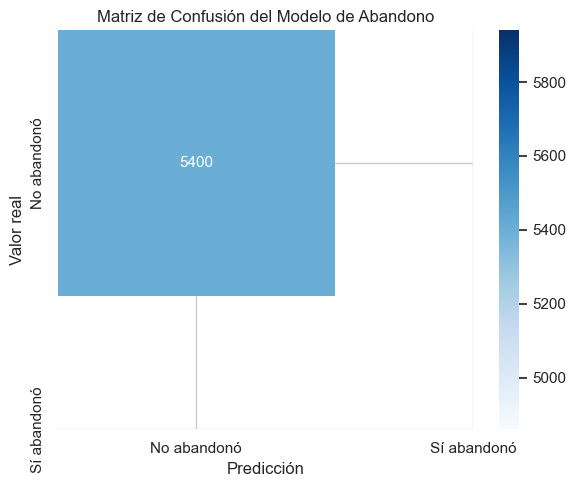

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener la matriz de confusi√≥n
matriz = confusion_matrix(y_test, y_pred)

# Etiquetas
etiquetas = ['No abandon√≥', 'S√≠ abandon√≥']

# Crear mapa de calor
plt.figure(figsize=(6, 5))
sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues', xticklabels=etiquetas, yticklabels=etiquetas)
plt.title('Matriz de Confusi√≥n del Modelo de Abandono')
plt.xlabel('Predicci√≥n')
plt.ylabel('Valor real')
plt.tight_layout()
plt.show()


## Visualizaciones

### Importancia de variables

- En un modelo como Random Forest es crucial para entender qu√© factores est√°n contribuyendo m√°s al riesgo de abandono. 
- Dar√° una visi√≥n clara para la universidad, y permitir√° tomar decisiones m√°s informadas (campa√±as de apoyo acad√©mico, programas de salud mental, etc.).

Variables m√°s influyentes:

                        Variable  Importancia
0                           Edad          0.0
1           Nota Primer Semestre          0.0
2          Nota Segundo Semestre          0.0
3                    Asignaturas          0.0
4  Porcentaje Ex√°menes Aprobados          0.0
5                     Asistencia          0.0
6                 Uso Biblioteca          0.0
7               Estado Emocional          0.0
8                  Curso_Primero          0.0
9                   Curso_Quinto          0.0


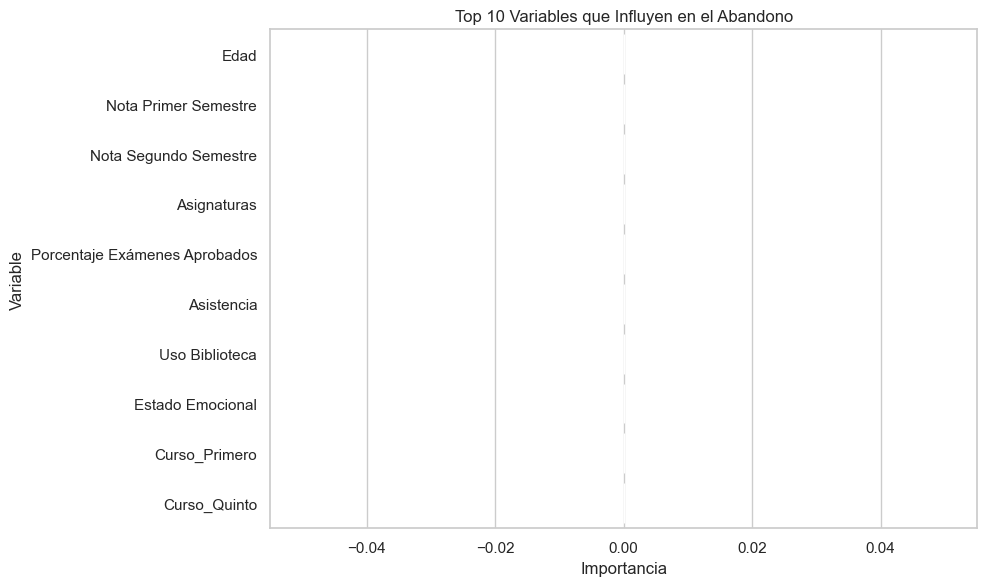

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extraer importancia de caracter√≠sticas
importancias = modelo.feature_importances_
nombres_columnas = X.columns

# Crear dataframe ordenado
df_importancia = pd.DataFrame({
    'Variable': nombres_columnas,
    'Importancia': importancias
}).sort_values(by='Importancia', ascending=False)

# Mostrar las 10 m√°s importantes
print("Variables m√°s influyentes:\n")
print(df_importancia.head(10))

# Visualizaci√≥n con gr√°fico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Importancia', y='Variable', data=df_importancia.head(10), palette='viridis', hue='Variable')
plt.title('Top 10 Variables que Influyen en el Abandono')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.tight_layout()
plt.show()


In [9]:
# Recuento de cada clase
recuento_abandono = df['Abandono'].value_counts()
porcentaje_abandono = df['Abandono'].value_counts(normalize=True) * 100

print("Recuento de abandono:")
print(recuento_abandono)
print("\n Porcentaje de abandono:")
print(porcentaje_abandono.round(2))


Recuento de abandono:
Abandono
No    18000
Name: count, dtype: int64

 Porcentaje de abandono:
Abandono
No    100.0
Name: proportion, dtype: float64


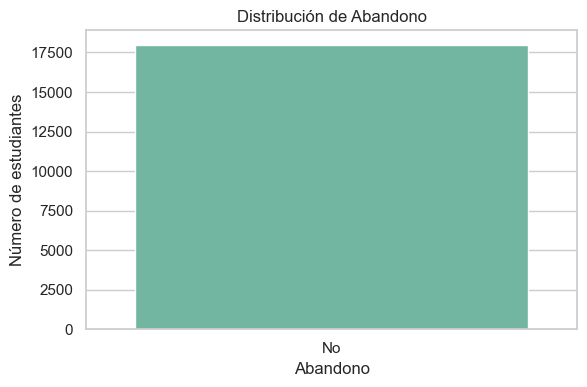

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x='Abandono', data=df, color='salmon', palette='Set2', hue='Abandono')
plt.title('Distribuci√≥n de Abandono')
plt.xlabel('Abandono')
plt.ylabel('N√∫mero de estudiantes')
plt.tight_layout()
plt.show()


### Abandono vs Sexo

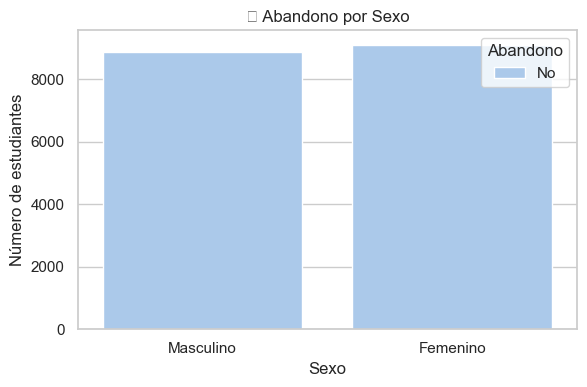

In [11]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Sexo', hue='Abandono', data=df, palette='pastel')
plt.title('üë• Abandono por Sexo')
plt.xlabel('Sexo')
plt.ylabel('N√∫mero de estudiantes')
plt.tight_layout()
plt.show()


### Abandono vs Nota Media

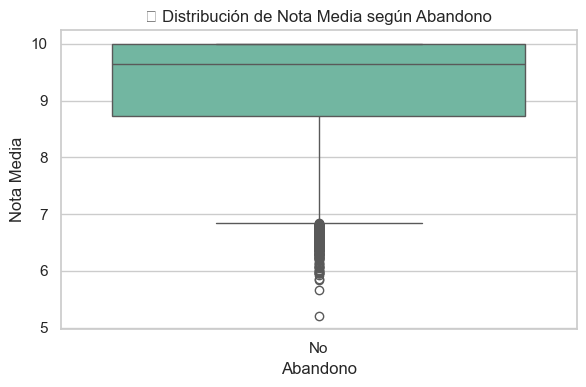

In [12]:
df['Nota Media'] = (df['Nota Primer Semestre'] + df['Nota Segundo Semestre']) / 2

plt.figure(figsize=(6, 4))
sns.boxplot(x='Abandono', y='Nota Media', data=df, palette='Set2', hue='Abandono')
plt.title('üìö Distribuci√≥n de Nota Media seg√∫n Abandono')
plt.xlabel('Abandono')
plt.ylabel('Nota Media')
plt.tight_layout()
plt.show()


### Abandono vs Edad

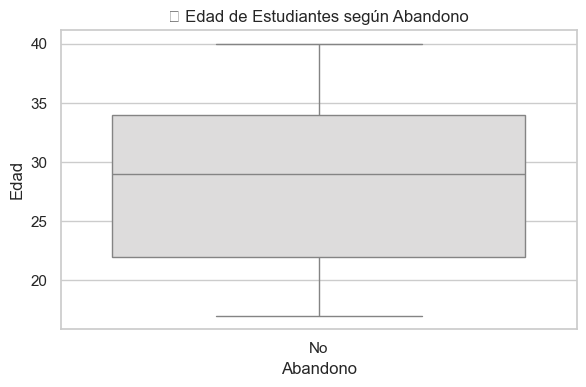

In [13]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Abandono', y='Edad', data=df, palette='coolwarm', hue='Abandono')
plt.title('üéì Edad de Estudiantes seg√∫n Abandono')
plt.xlabel('Abandono')
plt.ylabel('Edad')
plt.tight_layout()
plt.show()


## Objetivo: Predicci√≥n de la Nota Media
- Variable objetivo: Nota Media (creada como el promedio de los dos semestres)

- Variables explicativas: todas excepto Nota Primer Semestre, Nota Segundo Semestre, ID, y por supuesto Nota Media

### Modelo base

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Cargar y preparar datos
df['Nota Media'] = (df['Nota Primer Semestre'] + df['Nota Segundo Semestre']) / 2
df_regresion = df.drop(columns=['ID', 'Nota Primer Semestre', 'Nota Segundo Semestre'])

# Codificar variables categ√≥ricas
df_encoded = pd.get_dummies(df_regresion, drop_first=True)

# Separar features y target
X = df_encoded.drop(columns=['Nota Media'])
y = df_encoded['Nota Media']

# Divisi√≥n de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelo baseline
modelo_base = LinearRegression()
modelo_base.fit(X_train, y_train)

# Predicciones
y_pred = modelo_base.predict(X_test)

# Evaluaci√≥n
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Resultados
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R¬≤ Score: {r2:.2f}")
print("\n EXPLICACI√ìN DE LAS M√âTRICAS:")
print("- MAE: Error promedio absoluto entre predicciones y valores reales.")
print("- RMSE: Ra√≠z del error cuadr√°tico medio, penaliza errores grandes.")
print("- R¬≤ Score: Proporci√≥n de varianza explicada por el modelo, entre 0 y 1.")


MAE: 0.29
RMSE: 0.39
R¬≤ Score: 0.81

 EXPLICACI√ìN DE LAS M√âTRICAS:
- MAE: Error promedio absoluto entre predicciones y valores reales.
- RMSE: Ra√≠z del error cuadr√°tico medio, penaliza errores grandes.
- R¬≤ Score: Proporci√≥n de varianza explicada por el modelo, entre 0 y 1.


### Modelo base con las features del modelo complejo

In [15]:
features_utilizadas = ['Edad', 'Asignaturas', 'Porcentaje Ex√°menes Aprobados',
                       'Asistencia', 'Uso Biblioteca', 'Estado Emocional']

X = df[features_utilizadas]
y = df['Nota Media']

# Divisi√≥n de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelo baseline
modelo_base_feat_util = LinearRegression()
modelo_base_feat_util.fit(X_train, y_train)

# Predicciones
y_pred = modelo_base_feat_util.predict(X_test)

# Evaluaci√≥n
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Resultados
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R¬≤ Score: {r2:.2f}")
print("\n EXPLICACI√ìN DE LAS M√âTRICAS:")
print("- MAE: Error promedio absoluto entre predicciones y valores reales.")
print("- RMSE: Ra√≠z del error cuadr√°tico medio, penaliza errores grandes.")
print("- R¬≤ Score: Proporci√≥n de varianza explicada por el modelo, entre 0 y 1.")

MAE: 0.31
RMSE: 0.41
R¬≤ Score: 0.78

 EXPLICACI√ìN DE LAS M√âTRICAS:
- MAE: Error promedio absoluto entre predicciones y valores reales.
- RMSE: Ra√≠z del error cuadr√°tico medio, penaliza errores grandes.
- R¬≤ Score: Proporci√≥n de varianza explicada por el modelo, entre 0 y 1.


### Modelo de regresi√≥n m√°s complejo RandomForestRegressor

### Explicaci√≥n de las m√©tricas

M√©trica	Valor	Interpretaci√≥n

- MAE	0.80	El error promedio entre la nota predicha y la real es de 0.8 puntos. Bastante aceptable como baseline.

- RMSE	0.99	Similar al MAE, pero penaliza m√°s los errores grandes. Casi 1 punto promedio de desviaci√≥n.

- R¬≤ Score	-0.00	Esto indica que el modelo no explica mejor que una l√≠nea horizontal (media constante). Est√° por debajo de cero, lo que sugiere que no est√° capturando patrones √∫tiles a√∫n.

### Gr√°ficos

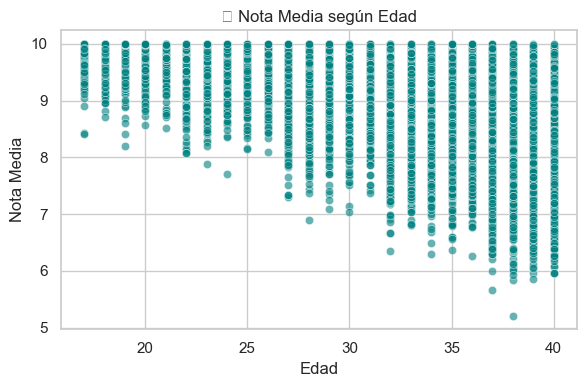

In [16]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Edad', y='Nota Media', data=df, color='teal', alpha=0.6)
plt.title('üìä Nota Media seg√∫n Edad')
plt.xlabel('Edad')
plt.ylabel('Nota Media')
plt.tight_layout()
plt.show()


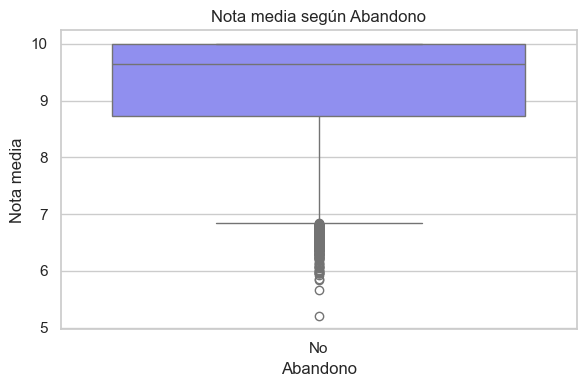

In [17]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Abandono', y='Nota Media', data=df, palette='cool')
plt.title('Nota media seg√∫n Abandono')
plt.xlabel('Abandono')
plt.ylabel('Nota media')
plt.tight_layout()
plt.show()


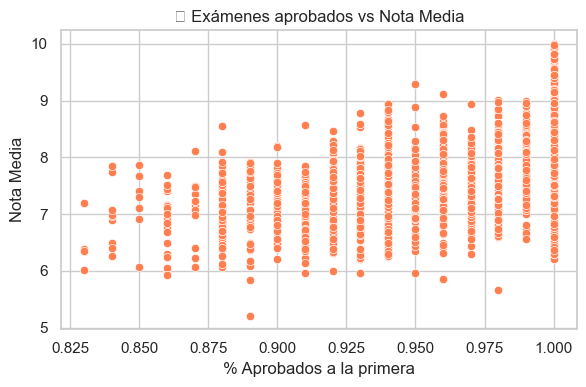

In [18]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Porcentaje Ex√°menes Aprobados', y='Nota Media', data=df, color='coral')
plt.title('‚úÖ Ex√°menes aprobados vs Nota Media')
plt.xlabel('% Aprobados a la primera')
plt.ylabel('Nota Media')
plt.tight_layout()
plt.show()

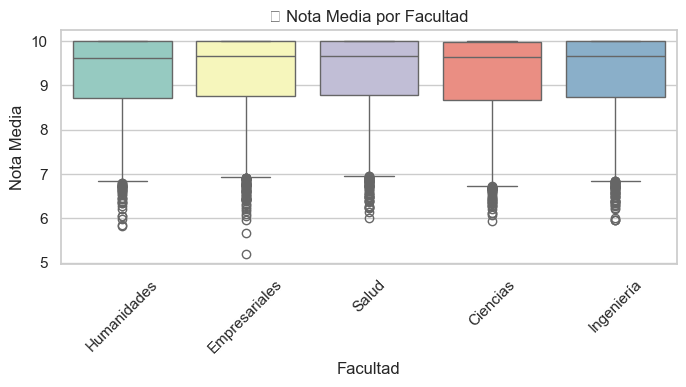

In [19]:
plt.figure(figsize=(7, 4))
sns.boxplot(x='Facultad', y='Nota Media', data=df, palette='Set3')
plt.title('üè´ Nota Media por Facultad')
plt.xlabel('Facultad')
plt.ylabel('Nota Media')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Matriz de correlaci√≥n

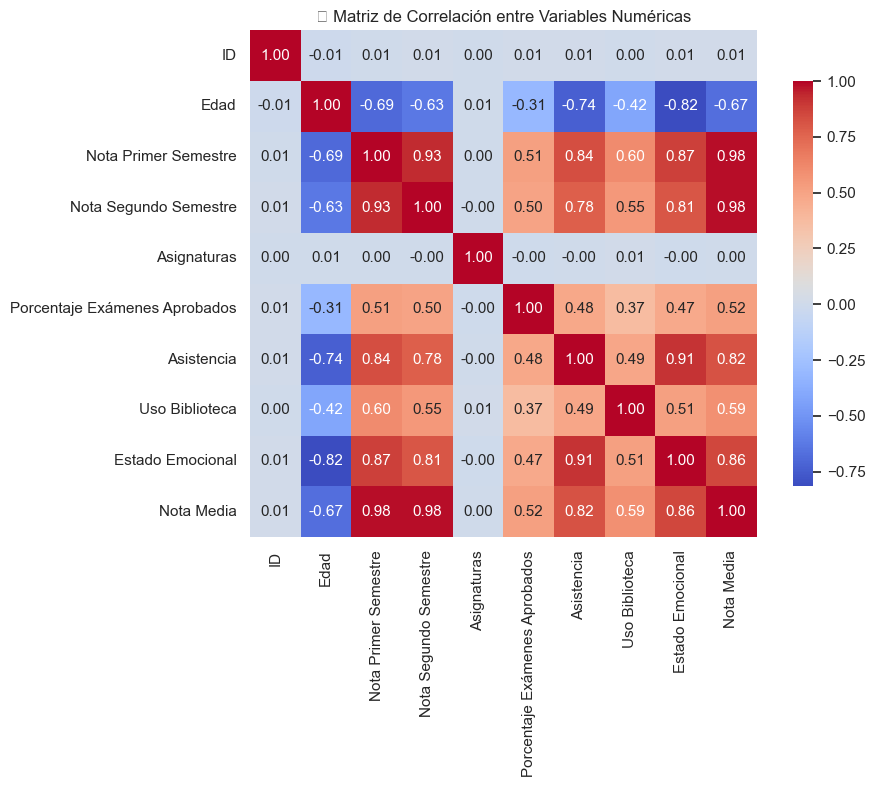

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtramos solo variables num√©ricas
df_numericas = df.select_dtypes(include=[np.number])

# Matriz de correlaci√≥n
correlacion = df_numericas.corr()

# Visualizaci√≥n con mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, annot=True, fmt=".2f", cmap='coolwarm', square=True,
            cbar_kws={"shrink": 0.8})
plt.title('üîó Matriz de Correlaci√≥n entre Variables Num√©ricas')
plt.tight_layout()
plt.show()


In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
import numpy as np

# Preparamos los datos
df['Nota Media'] = (df['Nota Primer Semestre'] + df['Nota Segundo Semestre']) / 2
features_utilizadas = ['Edad', 'Asignaturas', 'Porcentaje Ex√°menes Aprobados',
                       'Asistencia', 'Uso Biblioteca', 'Estado Emocional']

X = df[features_utilizadas]
y = df['Nota Media']

# Divisi√≥n en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo
modelo_rf = RandomForestRegressor(n_estimators=200, random_state=42)
modelo_rf.fit(X_train, y_train)

'''#  Guardar modelo y lista de features
joblib.dump(modelo_rf, "modelo_nota_media.joblib")
joblib.dump(features_utilizadas, "features_modelo.joblib")
print("Modelo actualizado y guardado con las 6 variables.")
'''
# Evaluaci√≥n
y_pred = modelo_rf.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f" MAE: {mae:.2f}")
print(f" RMSE: {rmse:.2f}")
print(f" R¬≤ Score: {r2:.2f}")


 MAE: 0.31
 RMSE: 0.44
 R¬≤ Score: 0.75


### Gr√°fico de residuos

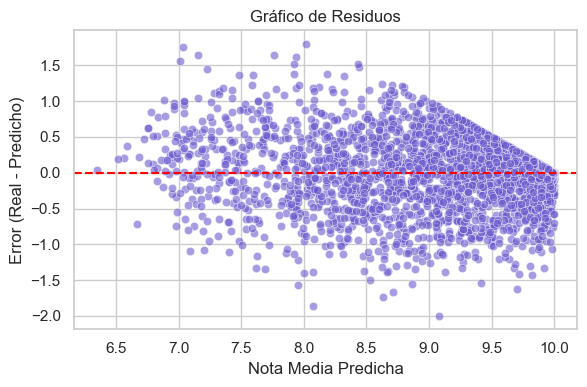

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular residuos
residuos = y_test - y_pred

plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_pred, y=residuos, alpha=0.6, color='slateblue')
plt.axhline(0, color='red', linestyle='--')
plt.title('Gr√°fico de Residuos')
plt.xlabel('Nota Media Predicha')
plt.ylabel('Error (Real - Predicho)')
plt.tight_layout()
plt.show()


### Comparaci√≥n de valores reales vs. predichos

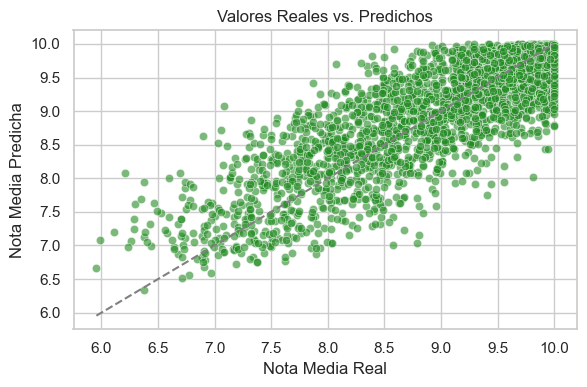

In [23]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='forestgreen')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='gray')
plt.title('Valores Reales vs. Predichos')
plt.xlabel('Nota Media Real')
plt.ylabel('Nota Media Predicha')
plt.tight_layout()
plt.show()


### Guardar los modelos

In [24]:
import joblib

# Crear carpeta 'models' si no existe
os.makedirs("models", exist_ok=True)

# Guardamos el modelo entrenado
joblib.dump(modelo_rf, 'models/modelo_rf_nota_media.joblib') # funciona en fast api
joblib.dump(modelo_base, 'models/modelo_base_nota_media.joblib')  # no funciona en fast api
'''ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Beca_S√≠
- Curso_Derecho
- Curso_Econom√≠a
- Curso_Historia
- Curso_Inform√°tica'''
joblib.dump(modelo_base_feat_util, 'models/modelo_base_feat_util_nota_media.joblib') #funciona en fast api, notas muy bajas

# (Opcional) guardar los features usados, si quieres asegurarte de que se pasan correctamente al predecir
joblib.dump(X.columns.tolist(), 'models/features_modelo.joblib')


['models/features_modelo.joblib']

## Pipeline scikit_learn

In [25]:
df.columns

Index(['ID', 'Edad', 'Curso', 'Grado', 'Facultad', 'Sexo', 'Nacionalidad',
       'Nota Primer Semestre', 'Nota Segundo Semestre', 'Asignaturas',
       'Porcentaje Ex√°menes Aprobados', 'Tipo de Acceso', 'Asistencia',
       'Uso Biblioteca', 'Beca', 'Estado Emocional', 'Abandono', 'Nota Media'],
      dtype='object')

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import joblib

# Cargar datos y calcular la nota media
df = pd.read_csv("data/dataset_estudiantes.csv")
df['Nota Media'] = (df['Nota Primer Semestre'] + df['Nota Segundo Semestre']) / 2

# Variables
variables_numericas = [
    'Edad', 'Asignaturas', 'Porcentaje Ex√°menes Aprobados',
    'Asistencia', 'Uso Biblioteca', 'Estado Emocional'
]

variables_categoricas = [
    'Curso', 'Grado', 'Facultad', 'Sexo', 'Nacionalidad',
    'Tipo de Acceso', 'Beca', 'Abandono'
]

X = df[variables_numericas + variables_categoricas]
y = df['Nota Media']

# Preprocesadores
preprocesador_numerico = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

preprocesador_categorico = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocesamiento = ColumnTransformer(transformers=[
    ('num', preprocesador_numerico, variables_numericas),
    ('cat', preprocesador_categorico, variables_categoricas)
])

pipeline_modelo = Pipeline(steps=[
    ('preprocesamiento', preprocesamiento),
    ('modelo', LinearRegression())
])

# Entrenamiento
pipeline_modelo.fit(X, y)

# Guardar el pipeline
joblib.dump(pipeline_modelo, 'models/pipeline_nota_media.joblib')
print("Modelo guardado en models/pipeline_nota_media.joblib")


Modelo guardado en models/pipeline_nota_media.joblib


In [27]:
# unqieu values of every categorical column
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}: {df[col].nunique()} valores √∫nicos")
    print(df[col].unique())
    print("---" * 20)

Curso: 5 valores √∫nicos
['Primero' 'Quinto' 'Segundo' 'Tercero' 'Cuarto']
------------------------------------------------------------
Grado: 5 valores √∫nicos
['Grado en Ingenier√≠a' 'Grado en Ciencias' 'Grado en Humanidades'
 'Grado en Salud' 'Grado en Empresa']
------------------------------------------------------------
Facultad: 5 valores √∫nicos
['Humanidades' 'Empresariales' 'Salud' 'Ciencias' 'Ingenier√≠a']
------------------------------------------------------------
Sexo: 2 valores √∫nicos
['Masculino' 'Femenino']
------------------------------------------------------------
Nacionalidad: 6 valores √∫nicos
['Colombiana' 'Espa√±ola' 'Italiana' 'Argentina' 'Francesa' 'Mexicana']
------------------------------------------------------------
Tipo de Acceso: 3 valores √∫nicos
['Examen' 'Convalidaci√≥n' 'Transferencia']
------------------------------------------------------------
Beca: 2 valores √∫nicos
['S√≠' 'No']
------------------------------------------------------------
Abandon

In [28]:
a = len(df)
a

18000

In [29]:
# numero de columnas de df
b = num_columnas = len(df.columns)
print(b)

18


In [30]:
print(f'El n√∫mero de data points es {a*b}')

El n√∫mero de data points es 324000


## Crear API REST con Fast API

In [31]:
#!pip install fastapi uvicorn joblib scikit-learn pandas


In [32]:
from fastapi import FastAPI
from pydantic import BaseModel
import joblib
import pandas as pd

# Cargar modelo y columnas
modelo = joblib.load('models/modelo_base_nota_media.joblib')
features = joblib.load('models/features_modelo.joblib')
codigo_api = """
from fastapi import FastAPI
from pydantic import BaseModel
import joblib
import pandas as pd

# Cargar modelo y columnas
modelo = joblib.load('modelo_nota_media.joblib')
features = joblib.load('features_modelo.joblib')

app = FastAPI(title="Predicci√≥n de Nota Media", description="API REST para estudiantes", version="1.0")

class Estudiante(BaseModel):
    Edad: int
    Asignaturas: int
    Porcentaje_Ex√°menes_Aprobados: float
    Asistencia: float
    Uso_Biblioteca: int
    Estado_Emocional: int

@app.post("/predecir")
def predecir_nota(data: Estudiante):
    datos = pd.DataFrame([data.dict()])
    for col in features:
        if col not in datos.columns:
            datos[col] = 0
    datos = datos[features]
    prediccion = modelo.predict(datos)[0]
    return {"Nota Media Estimada": round(prediccion, 2)}
"""

# Crear archivo main.py
with open("main.py", "w", encoding="utf-8") as f:
    f.write(codigo_api)
print("Archivo 'main.py' creado correctamente.")


Archivo 'main.py' creado correctamente.


### Ejecutar:
uvicorn main:app --reload
Ir a: 
http://localhost:8000/docs

In [33]:
import joblib
features = joblib.load('models/features_modelo.joblib')
print(features)

['Edad', 'Asignaturas', 'Porcentaje Ex√°menes Aprobados', 'Asistencia', 'Uso Biblioteca', 'Estado Emocional']


## Celda de prueba para simular entradas al modelo

In [34]:
'''
"Explicaci√≥n del proyecto.md"import joblib
import pandas as pd

# Cargar el modelo y las columnas que espera
modelo = joblib.load("models/modelo_base_nota_media.joblib")
features = joblib.load("models/features_modelo.joblib")

# Simular entradas distintas
entrada1 = {
    "Edad": 20,
    "Asignaturas": 6,
    "Porcentaje Ex√°menes Aprobados": 0.85,
    "Asistencia": 0.95,
    "Uso Biblioteca": 4,
    "Estado Emocional": 4
}

entrada2 = {
    "Edad": 35,
    "Asignaturas": 10,
    "Porcentaje Ex√°menes Aprobados": 0.65,
    "Asistencia": 0.65,
    "Uso Biblioteca": 1,
    "Estado Emocional": 2
}

# üìä Convertir en DataFrames
df1 = pd.DataFrame([entrada1])[features]
df2 = pd.DataFrame([entrada2])[features]

# üì§ Obtener predicciones
pred1 = modelo.predict(df1)[0]
pred2 = modelo.predict(df2)[0]

# üì¢ Mostrar resultados
print(f"üéì Entrada 1 ‚Üí Predicci√≥n: {round(pred1, 2)}")
print(f"üéì Entrada 2 ‚Üí Predicci√≥n: {round(pred2, 2)}")
'''


'\n"Explicaci√≥n del proyecto.md"import joblib\nimport pandas as pd\n\n# Cargar el modelo y las columnas que espera\nmodelo = joblib.load("models/modelo_base_nota_media.joblib")\nfeatures = joblib.load("models/features_modelo.joblib")\n\n# Simular entradas distintas\nentrada1 = {\n    "Edad": 20,\n    "Asignaturas": 6,\n    "Porcentaje Ex√°menes Aprobados": 0.85,\n    "Asistencia": 0.95,\n    "Uso Biblioteca": 4,\n    "Estado Emocional": 4\n}\n\nentrada2 = {\n    "Edad": 35,\n    "Asignaturas": 10,\n    "Porcentaje Ex√°menes Aprobados": 0.65,\n    "Asistencia": 0.65,\n    "Uso Biblioteca": 1,\n    "Estado Emocional": 2\n}\n\n# üìä Convertir en DataFrames\ndf1 = pd.DataFrame([entrada1])[features]\ndf2 = pd.DataFrame([entrada2])[features]\n\n# üì§ Obtener predicciones\npred1 = modelo.predict(df1)[0]\npred2 = modelo.predict(df2)[0]\n\n# üì¢ Mostrar resultados\nprint(f"üéì Entrada 1 ‚Üí Predicci√≥n: {round(pred1, 2)}")\nprint(f"üéì Entrada 2 ‚Üí Predicci√≥n: {round(pred2, 2)}")\n'